In [10]:
import pandas as pd
import numpy as np


In [11]:
import matplotlib as plt

### ratings_small.csv 
### manipulate timestamps for each item and each user
### timestamps are 17 time frames from 20150128 to 20160528 at each item and each user

In [12]:
movie_rating = pd.read_csv('ratings_small.csv')
movie_rating

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


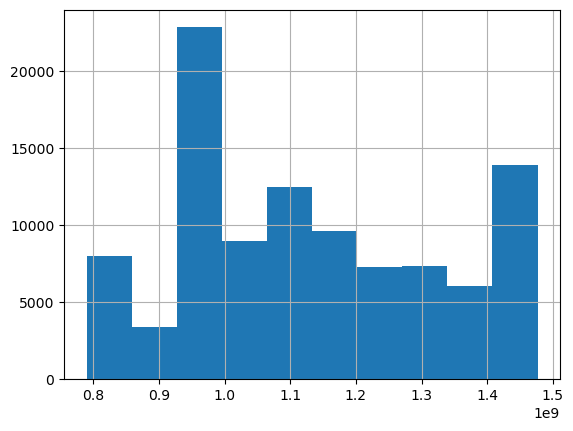

In [13]:
h = movie_rating.loc[:,'timestamp'].hist()

In [14]:
movie_rating[movie_rating.userId == 1]

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


### scale the timestamps using minmax scalar

In [15]:
from sklearn.preprocessing import MinMaxScaler
# 최소값 0, 최대값 1로 변환하는 MinMaxScaler객체 생성
scaler = MinMaxScaler()
a=np.array(movie_rating[movie_rating.userId == 1]['timestamp'])
# fit()하게 되면 train_array 데이터의 최소값이 0, 최대값이 10으로 설정.  
scaler.fit(a.reshape(-1,1))
# 1/10 scale로 train_array 데이터 변환함. 원본 10-> 1로 변환됨.
train_scaled = scaler.transform(a.reshape(-1,1))
 
print('원본 train_array 데이터:', np.round(a.reshape(-1,1), 2))
print('Scale된 train_array 데이터:', train_scaled)

b=np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])
scaler.fit(b.reshape(-1,1))
# 1/10 scale로 train_array 데이터 변환함. 원본 10-> 1로 변환됨.
train_scaled1 = scaler.transform(b.reshape(-1,1))
 
print('원본 train_array 데이터:', b.reshape(-1,1))
print('Scale된 train_array 데이터:', train_scaled1)

원본 train_array 데이터: [[1260759144]
 [1260759179]
 [1260759182]
 [1260759185]
 [1260759205]
 [1260759151]
 [1260759187]
 [1260759148]
 [1260759125]
 [1260759131]
 [1260759135]
 [1260759203]
 [1260759191]
 [1260759139]
 [1260759194]
 [1260759198]
 [1260759108]
 [1260759113]
 [1260759200]
 [1260759117]]
Scale된 train_array 데이터: [[0.37113402]
 [0.73195876]
 [0.7628866 ]
 [0.79381443]
 [1.        ]
 [0.44329897]
 [0.81443299]
 [0.41237113]
 [0.17525773]
 [0.2371134 ]
 [0.27835052]
 [0.97938144]
 [0.8556701 ]
 [0.31958763]
 [0.88659794]
 [0.92783505]
 [0.        ]
 [0.05154639]
 [0.94845361]
 [0.09278351]]
원본 train_array 데이터: [[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]]
Scale된 train_array 데이터: [[0.        ]
 [0.05882353]
 [0.11764706]
 [0.17647059]
 [0.23529412]
 [0.29411765]
 [0.35294118]
 [0.41176471]
 [0.47058824]
 [0.52941176]
 [0.58823529]
 [0.64705882]
 [0.70588235]
 [0.76470588]
 [0.82352941]
 [0.88235294]
 [0.94117647]
 [1

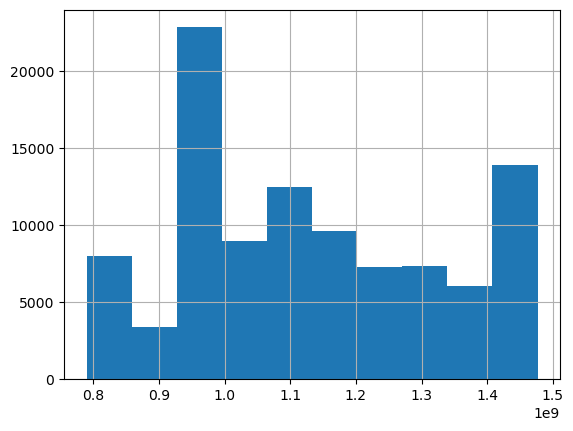

In [16]:
#h = test4.iloc[:,11:].hist(figsize=(20,20))
h = movie_rating.loc[:,'timestamp'].hist()

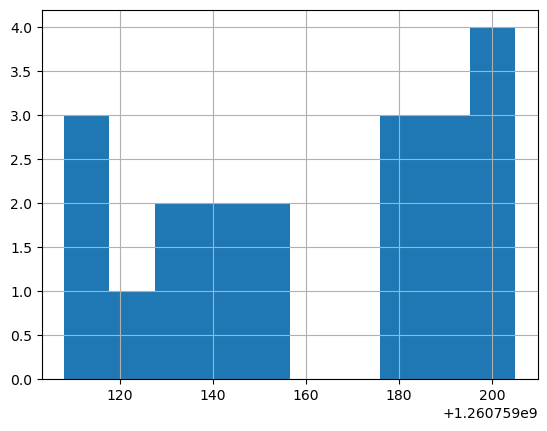

In [17]:
h = movie_rating[movie_rating['userId']==1]['timestamp'].hist()

## the base of scale is at each user

In [18]:
#유저별 타임스탬프로 스케일링해야함. 전체 타임스탬프 기준으로 스케일링하면, 
#유저별 다른 아이템을 동일시간대에 interaction한 결과로 데이터편향이 심해짐. 
#논문에는 데이터 타임스탬프 편향된 것을 그림으로 보여줄것.그리고 스케일링한 결과의 데이터분포도 보여주면 좋을듯!!!

from sklearn.preprocessing import MinMaxScaler
# 최소값 0, 최대값 1로 변환하는 MinMaxScaler객체 생성
scaler = MinMaxScaler()
#final_scale = np.array(100004,1)
i=1
for i in range(671):
    print(i+1)
    a=np.array(movie_rating[movie_rating.userId == i+1]['timestamp'])
    print(a)
    # fit()하게 되면 train_array 데이터의 최소값이 0, 최대값이 10으로 설정.  
    scaler.fit(a.reshape(-1,1))
    # 1/10 scale로 train_array 데이터 변환함. 원본 10-> 1로 변환됨.
    train_scaled = scaler.transform(a.reshape(-1,1))
    if i  == 0:
        final_scale = train_scaled 
        continue
    #movie_rating[movie_rating.userId == 1+1]['timestamp_tmp'] = train_scaled
    #final_scale.append(train_scaled)
    final_scale = np.concatenate((final_scale, train_scaled),axis=0) # np.vstack((a,b))

    
#print('원본 train_array 데이터:', np.round(a.reshape(-1,1), 2))
#print('Scale된 train_array 데이터:', final_scale)
#
#b=np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])
#scaler.fit(b.reshape(-1,1))
## 1/10 scale로 train_array 데이터 변환함. 원본 10-> 1로 변환됨.
#train_scaled1 = scaler.transform(b.reshape(-1,1))
# 
#print('원본 train_array 데이터:', b.reshape(-1,1))
#print('Scale된 train_array 데이터:', train_scaled1)

1
[1260759144 1260759179 1260759182 1260759185 1260759205 1260759151
 1260759187 1260759148 1260759125 1260759131 1260759135 1260759203
 1260759191 1260759139 1260759194 1260759198 1260759108 1260759113
 1260759200 1260759117]
2
[835355493 835355681 835355604 835355552 835355586 835356031 835355749
 835355532 835356016 835355395 835355441 835355493 835355441 835355710
 835355511 835355664 835355511 835355840 835355749 835355552 835355664
 835355896 835355511 835355681 835355697 835355586 835355767 835355779
 835355492 835355395 835355532 835356044 835355551 835355918 835355492
 835355441 835355697 835355628 835355749 835355604 835355619 835355932
 835355968 835356094 835355710 835356165 835356246 835355532 835355604
 835355511 835355790 835355828 835355643 835355918 835355880 835355731
 835355860 835355719 835355817 835355731 835356199 835355767 835356109
 835355767 835355860 835355817 835355790 835355779 835355441 835355697
 835355395 835355395 835355511 835355932 835356141 835355978]

[1178364904 1178364881 1137577638 1178364921 1137577630 1137577694
 1178363907 1178364916 1137577687 1137577912 1137577918 1137577616
 1137577645 1148214528 1137577753 1137577979 1148214227 1137577889
 1148214543 1148214272 1148214289 1148214251 1178364909 1137577776
 1137577730 1178364961 1137578034 1137577905 1148214661]
17
[1127469542 1127469531 1127470880 1127469436 1127469535 1127469246
 1127469450 1127469023 1127470242 1127468646 1127469509 1127470280
 1127468896 1127469577 1127469684 1127471027 1127474688 1127469552
 1127469604 1127469297 1127471192 1127469420 1127470013 1127469401
 1127469444 1127471468 1127469407 1127475344 1127472949 1127469434
 1127469561 1127469779 1127469416 1127469396 1127469440 1127472555
 1127473893 1127469466 1127469230 1127469000 1127470263 1127468839
 1127468627 1127468595 1127470036 1127471471 1127468808 1127468822
 1127469756 1127469594 1127471079 1127472146 1127474822 1127470622
 1127470607 1127473110 1127473686 1127469628 1127469308 1127469973
 1

[1148729853 1148730128 1166728170 1148672550 1148669114 1148720884
 1148673467 1148730400 1166728173 1148669590 1148670466 1148672099
 1166728220 1148669357 1148730116 1148669588 1148671365 1148672933
 1148720873 1148672842 1148386188 1148778581 1148729797 1148729698
 1148386155 1148729570 1148673304 1148669102 1148668973 1148668970
 1148728957 1148673465 1148720795 1148672319 1148671517 1149868544
 1148777951 1148777966 1148668967 1148668964 1148669351 1148672736
 1148668961 1148673085 1148728785 1148673420 1148669891 1148730048
 1148720861 1148673418 1148669887 1148730134 1148729018 1148720907
 1148669346 1148669881 1148669092 1148672198 1148729022 1148720627
 1166036040 1148729848 1148668958 1166728142 1166728178 1149868397
 1148728787 1148670328 1148671818 1148672375 1149868548 1148669338
 1148669574 1148672950 1148669090 1148669877 1166035850 1148669873
 1148670499 1148669858 1148673415 1148669865 1148669863 1148669087
 1148729708 1148670263 1148671970 1148671949 1148728764 114867

27
[939077258 939079553 939076893 939077164 939079002 939076893 939080935
 939078921 939079553 939080148 939079118 939080090 939079855 939079553
 939082326 939078921 939077258 939079779 939082276 939076569 939076677
 939076519 939076519]
28
[938942396 938944078 938944407 938944923 938944407 938944744 938944550
 938944636 938942682 938944975 938944975 938943150 938942682 938942755
 938942821 938944683 938944139 938944408 938943028 938942614 938943524
 938944744 938943150 938944457 938943202 938944923 938943028 938944505
 938944139 938944636 938943245 938942458 938944683 938942755 938944505
 938943202 938944407 938943150 938942821 938942529 938944457 938943408
 938943524 938944975 938944237 938944923 938943150 938944505 938943879
 938943976]
29
[1313927169 1313925564 1313925259 1313925074 1313925699 1313925185
 1313925639 1313924474 1313924446 1313927206 1313925688 1313925589
 1313925693 1313924856 1313925220 1313927224 1313927249 1313927226
 1313925421 1313927193 1313927309 1313924902]


[1473258241 1473258327 1473258165 1473258343 1473258147 1473258352
 1473258274 1473258331 1473258276 1473258322 1473258311 1473258231
 1473258320 1473258239 1473258424 1473258305 1473258392 1473258238
 1473258304 1473258161 1473258167 1473258283 1473258220 1473258209
 1473258445 1473258346 1473258360 1473258409 1473258315 1473258371
 1473258242 1473258169 1473258329 1473258309 1473258388 1473258340
 1473258318 1473258228 1473258373 1473258214 1473258181 1473258230
 1473258386 1473258362 1473258269 1473258378 1473258374 1473258404
 1473258313 1473258226 1473258244 1473258337 1473258248 1473258403
 1473258440 1473258450 1473258356 1473258438 1473258272 1473258436
 1473258396 1473258383 1473258427 1473258421 1473258369 1473258348
 1473258291 1473258281 1473258287 1473258334]
43
[974768260 974768402 974768903 974767953 974769666 974767808 974770180
 974768430 974769902 974769935 974768654 974767808 974769730 974767845
 974756704 974770079 974768798 974767746 974770589 974769370 974768872
 

[843159967 843159644 843159716 843159716 843159967 843159770 843159967
 843159967 843159644 843159871 843159770 843159716 843159716 843159871
 843159645 843159871 843159770 843159644 843159644 843159770 843159967]
65
[945118587 945149894 945150424 945118660 945150571 945150514 945150514
 945150037 945118792 945118614 945150175 945150351 945150351 945118543
 945150424 945150278 945150473 945150037 945150395 945149894 945149834
 945150395 945150395 945150351 945149894 945150011 945150351]
66
[974600703 974599486 974597659 974600526 974600461 974597735 974599725
 974599773 974600656 974599725 974599725 974599074 974599923 974600461
 974597684 974600526 974599834 974600198 974599434 974597627 974600461
 974600108 974597659 974600108 974599773 974600108 974600728 974599861
 974600572 974600012 974599543 974600600 974600491 974599923 974600198
 974600526 974599074 974599434 974600144 974600286 974599773 974599597
 974600366 974600526 974600198 974600703 974600656 974600626 974598446]
67
[854

90
[875517174 875517954 875517624 875517306 875517953 875516371 875520648
 875520409 875518226 875516370 875516370 875519306 875518088 875516731
 875518345 875520264 875517233 875520463 875518641 875517174 875518088
 875520464 875517754 875517233 875517953 895843258 875518345 875517306
 875518016 875514792 875517306 875517233 875519306 875514792 875515203
 875515203 875519715 875515030 875517174 876370672 876288277 875518289
 875517306 875516370 875518088 875517358 876288017 875515956 875515902
 875515030]
91
[1448798200 1448813887 1448813534 1448798511 1448798347 1448814310
 1448798142 1448813322 1448813386 1448798105 1448814317 1448798101
 1448798168 1448814268 1448798508 1448814281 1448798139 1448798326
 1448798161 1448814498 1448798146 1448798490 1448798242 1448798104
 1448798107 1448798180 1448798136 1448798206 1448798178 1448798300
 1448798307 1448798140 1448798532 1448798342 1448798143 1448813382
 1448814231 1448814231 1448814230 1448814268 1448798112 1448813169
 1448814124 1448

156
[1277430241 1277429637 1277429506 1277430118 1277429585 1277429569
 1277429489 1277429611 1277429617 1277429566 1277429999 1277429498
 1277429539 1277429559 1277429786 1277429514 1277429575 1277430139
 1277430057 1277429528 1277429591 1277430041 1277429624 1277429905
 1277429941 1277430276 1277429930 1277429977 1277430183 1277430169
 1277429860 1277429834 1277430028 1277429950 1277429804 1277430198
 1277430018 1277430103 1277429774 1277429880 1277429888 1277429869
 1277430304 1277429818 1277430461]
157
[1291598726 1291654669 1291598989 1291598164 1308343617 1323623560
 1292893066 1323549288 1293113893 1291598753 1365940346 1291599967
 1291598691 1291598182 1291599434 1293212841 1365939855 1365940218
 1365940267 1292452031 1292893321 1292452011 1365940159 1293113928
 1291599281 1362937775 1293016220 1292893387 1291598937 1291598930
 1291598910 1291598746 1291599847 1291599703 1291598762 1291654589
 1292893393 1291598808 1293016236 1291598784 1291598908 1291599001
 1291599826 1291599

[1276205768 1276205691 1295458775 1295459361 1295458745 1295459249
 1295458665 1276205530 1295459628 1295459287 1276205797 1295458819
 1295459572 1295458792 1295460096 1295458718 1276205558 1295460021
 1276206397 1295459225 1276205604 1295460103 1276205429 1295459170
 1295459393 1295459618 1295459397 1295459290 1295460254 1295459291
 1295459191 1295459398 1295459509 1295459270 1295460283 1295459978
 1276205381 1295459570 1295459523 1295459335 1295459318 1295459201]
187
[1228072644 1237164142 1230360891 1228083642 1241225121 1233516836
 1241388228 1241931376 1233459044 1233448960 1241388856 1230362008
 1228072708 1228071856 1241225088 1241225489 1228072628 1230417239
 1228072636 1228072734 1241224512 1228072670 1228072373 1237164136
 1228072687 1228072720 1233449807 1230417209 1233450000 1233448869
 1233449697 1228072772 1228072634 1228072703 1233459078 1230360992
 1230361549 1237164197 1228073327 1228072659 1228072631 1233458835
 1228072685 1233458937 1228072697 1237164040 1230361515 1

242
[956682763 956684268 956682997 956685888 956683024 956685619 956683813
 956686556 956682698 956683601 956685503 956685336 956682964 956684660
 956686165 956683581 956688563 956683116 956683189 956683697 956685910
 956684962 956686266 956684523 956682849 956686438 956683909 956682826
 956683089 956686146 956684986 956686092 956685371 956683725 956684523
 956683421 956684700 956683697 956683024 956682849 956685888 956685998
 956682826 956682894 956682997 956686736 956684438 956682911 956685782
 956684268 956682390 956683116 956686292 956686226 956683937 956686838
 956682934 956689050 956685888 956684185 956685706 956686752 956684185
 956684268 956686199 956684403 956684901 956683421 956683627 956683581
 956688507 956685834 956688281 956685475 956683457 956688220 956683457
 956685782 956684523 956683189 956682390 956685910 956684700 956688480
 956686146 956683697 956685946 956683881 956686455 956685336 956683838
 956684901 956688756 956689131 956688564 956686633 956688480 956688410
 9

[1215831130 1215831526 1215831215 1215831682 1215831546 1215823643
 1215831195 1215831457 1215831650 1215831113 1215831121 1215831823
 1215831868 1215831772 1215832175 1215831499 1215831199 1215831109
 1215831098 1215832398 1215823680 1215832057 1215831664 1215831149
 1215831182 1215831720 1215823900 1215831211 1215831647 1215831608
 1215831241 1215831104 1215831197 1215832370 1215832012 1215831903
 1215831899 1215831747 1215832111 1215831127 1215831124 1215831118
 1215831101 1215831193 1215823599 1215832276 1215831190 1215831575
 1215831578 1215831132 1215832019 1215831789 1215831636 1215831863
 1215831931 1215832322 1215832005 1215823875 1215832168 1215831711
 1215831872 1215823621 1215831506 1215832836 1215831587 1215831245
 1215831247 1215832718 1215831221 1215831154 1215831961 1215831853
 1215831136 1215831988 1215823884 1215831602 1215831981 1215831652
 1215823815 1215831591 1215823829 1215831226 1215823745 1215823932
 1215831254 1215831966 1215831742 1215831859 1215832853 121583

269
[883223516 883223543 883223796 883223660 883223566 883223474 883223712
 883223712 883223594 883223474 883223594 883223594 883223566 883223618
 883223474 883223660 883223594 883223686 883223543 883223712 883223730
 883223796 883223516 883223594 883223566]
270
[1469278482 1469256693 1469278482 1469282203 1469278482 1469282207
 1469278482 1469278481 1469282204 1469278482 1469278482 1469278482
 1469278482 1469256721 1469278298 1469278482 1469256684 1469278481
 1469278482 1469305978 1469306009 1469278342 1469278482 1469278482
 1469278482 1469306270 1469278482 1469256718 1469306892 1469278327
 1469278482 1469278482 1469305964 1469278482 1469305997 1469305980
 1469306365 1469306181 1469278481 1469306120 1469306790 1469306094
 1469278401 1469306137 1469306646 1469306071 1469278335 1469305954
 1469306080 1469306868 1469305960 1469306704 1469306252 1469278359
 1469306291 1469278482 1469306513 1469306032 1469306672 1469306633
 1469306300 1469278365 1469306026 1469305968 1469306118 1469278482


329
[867072004 867072039 867072039 867072039 867072073 867072005 867072004
 867072005 867072073 867072039 867072039 867072004 867072073 867072073
 867072039 867072004 867072004 867072039 867072073 867072039 867072117
 867072073]
330
[948574059 948576623 948577275 948578017 948577200 948731488 948577603
 948577126 948575949 948576723 948577776 948576623 948576723 948576143
 948577039 948731347 948577631 948577543 948577232 948576522 948578017
 948574126 948577379 948577507 948575236 948576522 948574412 948576522
 948577776 948575949 948575888 948577275 948575236 948577847 948577164
 948576522 948577340 948576914 948576522 948576723 948576871 948574466
 948577507 948576871 948576914 948574126 948575358 948577200 948575236
 948577701 948577543 948577442 948574126 948576522 948574467 948575236
 948577847 948576674 948731410 948574412 948577408 948577442 948575845
 948576763 948576763 948574520 948577897 948578017 948577728 948577603
 948731214 948731380 948575027 948574412 948577701 948574

407
[ 962646314  962648347 1085507289  962647111  962646804  962675654
  962646253  962647368  962646871  962646804  962647874  962646954
  962648320  962646090  962647453  962647841  962646754  962646090
  962647553  962646714  962646041  962646090  962647247  962646429
  962675697  962648282  962647453  962646896  962648188  962675853
  962647221  962647040  962646216  962675902  962646804  962646653
  962648188  962647742  962645604  962646681  962647175  962647646
  962646429  962646653  962647646  962647742  962646348  962646120
  962647553  962646090  962646804  962648467  962648320  962647646
  962646429  962647076  962645690  962647925 1095353349  962648320
  962645690 1057181653  962645645  962646348  962647646  962675620
  962675697  962647874  962646187  962648005  962647403  962675942
  962647577  962648071  962646617  962647646  962647202  962646714
  962647646  962646714  962647151  962646994  962647925  962645645
  962648123  962675853  962646843  962648071  962646503  9

424
[1088826826 1088826578 1088826626 1088826612 1088826602 1088826569
 1088826655 1088826555 1088826652 1088826807 1088826791 1088826633
 1088826606 1088826659 1088826932 1088826923 1088826914 1088826778
 1088826788 1088826664 1088826798 1088826594 1088826794 1088826881
 1088826857 1088826863 1088826583 1088826564 1088826838 1088826870]
425
[1112383737 1112383600 1112383800 1112383604 1112383838 1112383542
 1112537739 1112383732 1112383561 1112383529 1112537663 1112383621
 1112537716 1112383574 1112537707 1112537799 1112383753 1112383762
 1112537786 1112383587 1112383774 1112383595 1112383851 1112383591
 1112383523 1112383538 1112537806 1112383767 1112383783 1112383742
 1112383804 1112383533 1112383580 1112383625 1112383892 1112383856
 1112537782 1112383822 1112537653 1112383616 1112537769 1112383721
 1112537791 1112383847 1112383908 1112537731 1112383869 1112383905
 1112383828 1112383873 1112383747 1112383861 1112383811 1112537722
 1112383888]
426
[1312723226 1310374386 1310376031 13

440
[835337057 835337237 835337099 835337079 835337099 835337057 835336935
 835336972 835337079 835337370 835337057 835337237 835336936 835336996
 835336996 835336972 835337417 835337200 835337121 835337181 835337586
 835337795 835337294 835336937 835337309 835337608 835337519 835337447
 835337216 835337573 835337598 835337200 835337391 835337370 835336972
 835337275 835336934 835336934 835337038 835336997]
441
[1079561308 1048091888 1055274300 1078145577 1078145992 1078145987
 1048092031 1079562066 1053624079 1048091840 1079561932 1078145785
 1078145955 1078146006 1079561964 1078145967 1078145974 1055273872
 1079562098 1055273727 1055274068 1078145979 1078145983 1078145960
 1055273880 1079561110 1078145899 1084313016 1055172641 1055273558
 1048091084 1084312997 1053623849 1078145804 1078145792 1048092142
 1055274130 1078145809 1084313048 1078146014 1084312933 1053623871
 1084313046 1078145798 1084313034 1048090962 1055274102 1048091927
 1055173947 1055274107 1079561951 1055274051 1079

[859210690 859210733 859210733 859210733 859210803 859210691 859210690
 859210733 859210803 859210691 859210761 859210803 859210761 859210803
 859210690 859210761 859210733 859210690 859210690 859210761 859210733
 859210803]
460
[1072836909 1072837815 1072836608 1072836688 1072836078 1072836886
 1072836067 1072836483 1072836469 1072838019 1072837377 1072837086
 1072837875 1072836864 1072835963 1072836994 1072836501 1072836805
 1072836897 1072836838 1072836586 1072837585 1072836719 1072836034
 1072837293 1072839132 1072839259 1072838351 1072838174 1072837232
 1072838136 1072837123 1072836030 1072838843 1072837821 1072838505
 1072836010 1072836074 1072836757 1072836717 1072838640 1072837098
 1072836971 1072839194 1072836705 1072837714 1072836530 1072837859
 1072836583 1072836900 1072835996 1072836013 1072837222 1072838911
 1072838860 1072837140 1072839318 1072838953 1072839331 1072836061
 1072837436 1072839367 1072837419 1072839340 1072837195 1072838001
 1072838037 1072836921 1072837466 

[861302126 861302161 861302538 861302126 861302126 861302161 861322516
 861302194 861302126 861302518 862510043 861302194 861302194 861322517
 861322705 861304067 861322649 861304067 861304066 861322482 861304067
 861302161 861322541 861304067 861322595 861302194 861322621 861322541
 861322517 861322621 861322705 869188561 861302161 861302126 861302276
 868218086 861302194 868636987 861304068 861302161 861302126 861302338
 861322481 861303351 861302227 861302881 861302194 861302338 861302161
 868217898 861302276 861303115 862510165 861302568 861302603 861302362
 868217367 861302161 861322482 861322481 868217382 861322481 868637282
 861322516 861322595 861322541 861322574 861322482 861322482 861322574
 861302227 861322516 861322705 861322621 861322574 861322621 861322649
 861303696 861322677 861322574 861322723 861322677 861322705 861322705
 861322677 861322574 861322649 861302403 861302276 861322516 861303115
 861302362 861302384 861302538 861303260 861303278 861303325 861303095
 86130

[831835670 831835741 831835877 831835552 831835577 831835835 831835647
 831835696 831835877 831835696 831835856 831835696 831835741 831835552
 831835696 831835647 831835577 831835877 831835647 831835552 831835835
 831835577 831835552 831835552 831835647]
539
[956159579 951928750 956159510 956858891 956858825 956159456 956159627
 951928689 956159610 956159553 956858863 956858891 951928751 956858810
 956159595 951928751 956858792 956159456 956858792 951928718 956159510
 956159323 956159211 956159265 956858720 956858772]
540
[1168076342 1168074085 1168075053 1168074137 1168076332 1168074098
 1168075163 1168076276 1168074045 1168073989 1168075355 1168075282
 1168075132 1168075070 1168075121 1168075646 1168075138 1168075097
 1168076298 1168076287]
541
[976829473 976830103 976829555 976829992 976829813 976829587 976830241
 976830173 976830014 976829508 976829555 976830210 976830283 976829843
 976829924 976830039 976830069 976830241 976830264 976830264 976829956
 976830039 976829924 976830069

[1418984606 1418984412 1418984381 1418984486 1418984960 1418984384
 1418984464 1418984467 1418984779 1418984415 1418984393 1418984521
 1418984474 1418984409 1418984418 1418984387 1418984545 1418984662
 1418984571 1418984950 1418984966 1418984676 1418984891 1418984717
 1418984549 1418984529 1418984551 1418984658 1418984633 1418984505
 1418985038 1418985032 1418985052 1418984470]
579
[1325550979 1325550977 1325551011 1325550995 1325551013 1325550999
 1325551004 1325551002 1325550911 1325550987 1325551184 1325551015
 1325550929 1325551007 1325550972 1325551081 1325550974 1325551191
 1325550976 1325551085 1325551251]
580
[1155616380 1165900696 1156473327 1276095731 1167158213 1167157922
 1167157502 1167161268 1167162836 1155618177 1155616561 1155875901
 1167162169 1155616730 1167159829 1155616536 1167161304 1167163380
 1273518992 1165292373 1155485539 1165900819 1165900726 1155485834
 1155485961 1155484637 1165899805 1167161239 1156127875 1165292250
 1165899265 1156128494 1155484508 116716

635
[1448301664 1448301764 1448301729 1448301659 1448301669 1448301726
 1448301753 1448301807 1448301756 1448301675 1448301738 1448301850
 1448301810 1448301802 1448301703 1448301858 1448301744 1448301864
 1448301725 1448301917 1448301885 1448301797]
636
[855227186 855227188 855227364 855227188 855227415 855227524 855227184
 855227232 855227262 855227321 855227547 855227416 855227385 855227385
 855227186 855227294 855227547 855227232 855227547 855227364 855227187
 855227415 855227339 855227186 855227294 855227523 855227321 855227547
 855227262 855227232]
637
[1231346461 1343142621 1343134397 1231346573 1231346553 1231346581
 1343134386 1231346519 1343134420 1231346495 1343134393 1343142617
 1343134402 1231346565 1231346547 1231346476 1231346568 1231346453
 1231346486 1231346491 1231346534 1231346504 1231346509 1343134381
 1231346518]
638
[1307558400 1307558493 1307558479 1307558409 1307558406 1307558438
 1307558388 1307558444 1307558441 1307558499 1307558482 1307558393
 1307558996 1307

In [19]:
len(final_scale)

100004

In [20]:
movie_rating1 = movie_rating.copy()

In [21]:
movie_rating1['timestamp_tmp'] = final_scale

In [22]:
movie_rating1

,userId,movieId,rating,timestamp,timestamp_tmp
0,1,31,2.5,1260759144,0.371134
1,1,1029,3.0,1260759179,0.731959
2,1,1061,3.0,1260759182,0.762887
3,1,1129,2.0,1260759185,0.793814
4,1,1172,4.0,1260759205,1.000000
...,...,...,...,...,...
99999,671,6268,2.5,1065579370,0.184210
100000,671,6269,4.0,1065149201,0.146088
100001,671,6365,4.0,1070940363,0.659307
100002,671,6385,2.5,1070979663,0.662790


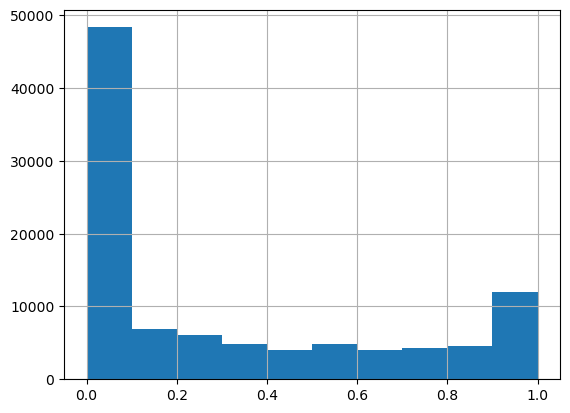

In [23]:
h = movie_rating1.loc[:,'timestamp_tmp'].hist()

In [24]:
movie_rating1[movie_rating['userId']==1]

,userId,movieId,rating,timestamp,timestamp_tmp
0,1,31,2.5,1260759144,0.371134
1,1,1029,3.0,1260759179,0.731959
2,1,1061,3.0,1260759182,0.762887
3,1,1129,2.0,1260759185,0.793814
4,1,1172,4.0,1260759205,1.000000
5,1,1263,2.0,1260759151,0.443299
6,1,1287,2.0,1260759187,0.814433
7,1,1293,2.0,1260759148,0.412371
8,1,1339,3.5,1260759125,0.175258
9,1,1343,2.0,1260759131,0.237113


In [25]:
del movie_rating1['timestamp']
movie_rating1 = movie_rating1.rename(columns={'timestamp_tmp':'timestamp'})
movie_rating1

,userId,movieId,rating,timestamp
0,1,31,2.5,0.371134
1,1,1029,3.0,0.731959
2,1,1061,3.0,0.762887
3,1,1129,2.0,0.793814
4,1,1172,4.0,1.000000
...,...,...,...,...
99999,671,6268,2.5,0.184210
100000,671,6269,4.0,0.146088
100001,671,6365,4.0,0.659307
100002,671,6385,2.5,0.662790


In [26]:
movie_rating1[movie_rating1['timestamp'] <0.05882353]

,userId,movieId,rating,timestamp
16,1,2294,2.0,0.000000
17,1,2455,2.5,0.051546
29,2,150,5.0,0.000000
30,2,153,4.0,0.054054
32,2,165,3.0,0.054054
...,...,...,...,...
99967,671,3897,2.0,0.000263
99971,671,4022,3.5,0.000018
99972,671,4027,4.0,0.000021
99991,671,5669,4.0,0.000174


In [27]:
movie_rating1.to_csv('movie_rating1.csv')

In [28]:
movie_rating1[:100]

,userId,movieId,rating,timestamp
0,1,31,2.5,0.371134
1,1,1029,3.0,0.731959
2,1,1061,3.0,0.762887
3,1,1129,2.0,0.793814
4,1,1172,4.0,1.000000
...,...,...,...,...
95,2,720,4.0,0.685076
96,3,60,3.0,0.001208
97,3,110,4.0,0.849181
98,3,247,3.5,0.000674


### divide 17 frames for scaled timestamps making the timstamps range from 20150128 and 20160528

In [30]:
#Scale된 train_array 데이터: [0.        ][0.05882353][0.11764706] [0.17647059] [0.23529412] [0.29411765] [0.35294118]
#[0.41176471] [0.47058824] [0.52941176] [0.58823529] [0.64705882] [0.70588235] [0.76470588] [0.82352941] [0.88235294]
#[0.94117647][1.        ]
import time
import datetime
from dateutil.relativedelta import relativedelta
from datetime import datetime

tmp_rating = []
#cp_rating = movie_rating.loc[0]
tmp_month = '2015-01-28'
tmp_month = datetime.strptime(tmp_month, '%Y-%m-%d').date()
tmp_time = int(time.mktime(tmp_month.timetuple()))

#for i in range(100):
for i in movie_rating1.index:
    if movie_rating1.loc[i]['timestamp'] >= 0 and movie_rating1.loc[i]['timestamp'] < 0.05882353:
        k = 0
    if movie_rating1.loc[i]['timestamp'] >= 0.05882353 and movie_rating1.loc[i]['timestamp'] < 0.11764706:
        k = 1
    if movie_rating1.loc[i]['timestamp'] >= 0.11764706 and movie_rating1.loc[i]['timestamp'] < 0.17647059:
        k = 2
    if movie_rating1.loc[i]['timestamp'] >= 0.17647059 and movie_rating1.loc[i]['timestamp'] < 0.23529412:
        k = 3
    if movie_rating1.loc[i]['timestamp'] >= 0.23529412 and movie_rating1.loc[i]['timestamp'] < 0.29411765:
        k = 4
    if movie_rating1.loc[i]['timestamp'] >= 0.29411765 and movie_rating1.loc[i]['timestamp'] < 0.35294118:
        k = 5
    if movie_rating1.loc[i]['timestamp'] >= 0.35294118 and movie_rating1.loc[i]['timestamp'] < 0.41176471: 
        k = 6
    if movie_rating1.loc[i]['timestamp'] >= 0.41176471 and movie_rating1.loc[i]['timestamp'] < 0.47058824:
        k = 7
    if movie_rating1.loc[i]['timestamp'] >= 0.47058824 and movie_rating1.loc[i]['timestamp'] < 0.52941176:
        k = 8
    if movie_rating1.loc[i]['timestamp'] >= 0.52941176 and movie_rating1.loc[i]['timestamp'] < 0.58823529:
        k = 9
    if movie_rating1.loc[i]['timestamp'] >= 0.58823529 and movie_rating1.loc[i]['timestamp'] < 0.64705882:
        k = 10
    if movie_rating1.loc[i]['timestamp'] >= 0.64705882 and movie_rating1.loc[i]['timestamp'] < 0.70588235:
        k = 11
    if movie_rating1.loc[i]['timestamp'] >= 0.70588235 and movie_rating1.loc[i]['timestamp'] < 0.76470588:
        k = 12
    if movie_rating1.loc[i]['timestamp'] >= 0.76470588 and movie_rating1.loc[i]['timestamp'] < 0.82352941: 
        k = 13
    if movie_rating1.loc[i]['timestamp'] >= 0.82352941 and movie_rating1.loc[i]['timestamp'] < 0.88235294:
        k = 14
    if movie_rating1.loc[i]['timestamp'] >= 0.88235294 and movie_rating1.loc[i]['timestamp'] < 0.94117647:
        k = 15
    if movie_rating1.loc[i]['timestamp'] >= 0.94117647 and movie_rating1.loc[i]['timestamp'] <= 1:
        k = 16
        
    #print(type(movie_rating.loc[i]))   
    
    #print(k)
    for j in range(k):
        #print(tmp_month)
        cp_rating = movie_rating1.loc[i].copy()
        tmp_time = int(time.mktime(tmp_month.timetuple()))
        #print(tmp_time)
        cp_rating['timestamp'] = tmp_time
        #cp_rating.replace('timestamp', tmp_time, inplace=True)
        #print(cp_rating['timestamp'])
        cp_rating['rating'] = 0
        #print(cp_rating)
        tmp_rating.append(cp_rating)
        tmp_month = tmp_month + relativedelta(months=1)
        #print(tmp_rating)
        
    
    m = 17-k  
    #print(m)
    for l in range(m):
        #print("test", tmp_month)
        cp1_rating = movie_rating1.loc[i].copy()
        cp1_rating['rating'] = cp1_rating['rating'] * 0.2 
        #tmp_month = tmp_month + relativedelta(months=1)
        tmp_time = int(time.mktime(tmp_month.timetuple()))
        cp1_rating['timestamp'] = tmp_time
        tmp_rating.append(cp1_rating)
        tmp_month = tmp_month + relativedelta(months=1)
    
    tmp_month = '2015-01-28'
    tmp_month = datetime.strptime(tmp_month, '%Y-%m-%d').date()
    
A = pd.DataFrame(tmp_rating)

In [31]:
tmp_rating

[userId       1.000000e+00
 movieId      3.100000e+01
 rating       0.000000e+00
 timestamp    1.422403e+09
 Name: 0, dtype: float64,
 userId       1.000000e+00
 movieId      3.100000e+01
 rating       0.000000e+00
 timestamp    1.425082e+09
 Name: 0, dtype: float64,
 userId       1.000000e+00
 movieId      3.100000e+01
 rating       0.000000e+00
 timestamp    1.427501e+09
 Name: 0, dtype: float64,
 userId       1.000000e+00
 movieId      3.100000e+01
 rating       0.000000e+00
 timestamp    1.430176e+09
 Name: 0, dtype: float64,
 userId       1.000000e+00
 movieId      3.100000e+01
 rating       0.000000e+00
 timestamp    1.432768e+09
 Name: 0, dtype: float64,
 userId       1.000000e+00
 movieId      3.100000e+01
 rating       0.000000e+00
 timestamp    1.435446e+09
 Name: 0, dtype: float64,
 userId       1.000000e+00
 movieId      3.100000e+01
 rating       5.000000e-01
 timestamp    1.438038e+09
 Name: 0, dtype: float64,
 userId       1.000000e+00
 movieId      3.100000e+01
 rating 

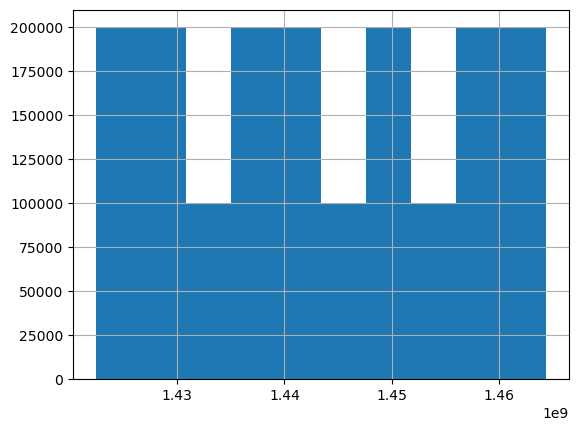

In [32]:
h = A.loc[:,'timestamp'].hist()

In [33]:
A

,userId,movieId,rating,timestamp
0,1.0,31.0,0.0,1.422403e+09
0,1.0,31.0,0.0,1.425082e+09
0,1.0,31.0,0.0,1.427501e+09
0,1.0,31.0,0.0,1.430176e+09
0,1.0,31.0,0.0,1.432768e+09
...,...,...,...,...
100003,671.0,6565.0,0.0,1.453939e+09
100003,671.0,6565.0,0.0,1.456618e+09
100003,671.0,6565.0,0.0,1.459120e+09
100003,671.0,6565.0,0.0,1.461798e+09


In [34]:
A[A['userId']==1]

,userId,movieId,rating,timestamp
0,1.0,31.0,0.0,1.422403e+09
0,1.0,31.0,0.0,1.425082e+09
0,1.0,31.0,0.0,1.427501e+09
0,1.0,31.0,0.0,1.430176e+09
0,1.0,31.0,0.0,1.432768e+09
...,...,...,...,...
19,1.0,3671.0,0.6,1.453939e+09
19,1.0,3671.0,0.6,1.456618e+09
19,1.0,3671.0,0.6,1.459120e+09
19,1.0,3671.0,0.6,1.461798e+09


In [35]:
A = A.sort_values(by=["userId","timestamp","movieId"], ascending=True)
A

,userId,movieId,rating,timestamp
0,1.0,31.0,0.0,1.422403e+09
1,1.0,1029.0,0.0,1.422403e+09
2,1.0,1061.0,0.0,1.422403e+09
3,1.0,1129.0,0.0,1.422403e+09
4,1.0,1172.0,0.0,1.422403e+09
...,...,...,...,...
99999,671.0,6268.0,0.5,1.464390e+09
100000,671.0,6269.0,0.8,1.464390e+09
100001,671.0,6365.0,0.8,1.464390e+09
100002,671.0,6385.0,0.5,1.464390e+09


### basic file making for CASE1 ~ CASE6

In [36]:
A.to_csv("tmp_rating.csv", header= None, index=False)